In [15]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))


from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

In [16]:

from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

In [18]:
def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
d_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 49)                134750    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         135485    
                                                                 
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________


In [20]:
d_autoencoder.fit(x_train, x_train,
                  epochs=100,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2199 - val_loss: 0.1467
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1309 - val_loss: 0.1180
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1139 - val_loss: 0.1072
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1056 - val_loss: 0.1017
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1010 - val_loss: 0.0979
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0979 - val_loss: 0.0954
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0955 - val_loss: 0.0933
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0935 - val_loss: 0.0914
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0916 - val_loss: 0.0901
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0901 - val_

1/1 [==============================] - 0s 22ms/step


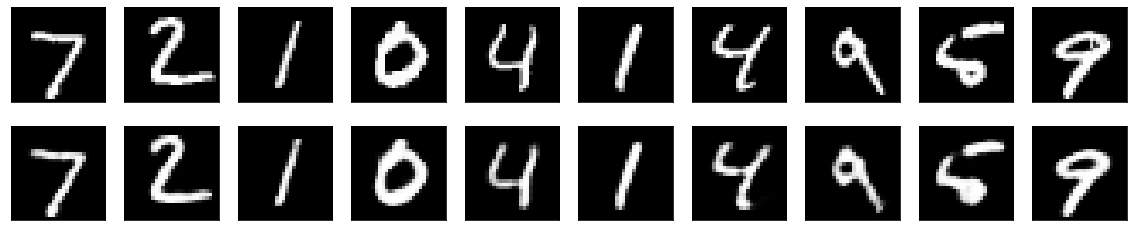

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()



n = 10

imgs = x_test[:n]
encoded_imgs = d_encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)